ссылка на датасет: https://disk.yandex.com/d/xxOu37iPw59sPg

Задания в целом были несложные, но было интересно вспомнить некоторые инструменты пандас, т.к. в последнее время уделял больше времение на изучение ml алгоритмов. Затратил на их выпонение около 2 часов. Но некоторые сложности возникли при выполнении 2 задания, где я пытался заполнить пропущенные значения через fillna в один заход, что никак не получалось (на чем застрял на час). Использовав другой подход, удалось сразу решить задачу.

In [1]:
import pandas as pd

### Изучение и предобработка данных

In [2]:
df = pd.read_json("assignment_data.jsonl",  lines=True)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001169 entries, 0 to 1001168
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   player_id   1001169 non-null  object
 1   country     500584 non-null   object
 2   event       1001169 non-null  object
 3   session_id  1001169 non-null  object
 4   ts          1001169 non-null  object
dtypes: object(5)
memory usage: 38.2+ MB


In [3]:
df['ts'] = pd.to_datetime(df['ts'])
df

,player_id,country,event,session_id,ts
0,d6313e1fb7d247a6a034e2aadc30ab3f,PK,start,674606b1-2270-4285-928f-eef4a6b90a60,2016-11-22 20:40:50
1,20ac16ebb30a477087c3c7501b1fce73,NaN,end,16ca9d01-d240-4527-9f8f-00ef6cddb1d4,2016-11-18 06:24:50
2,318e22b061b54042b880c365c28982d0,NaN,end,5f933591-8cd5-4147-8736-d6237bef5891,2016-11-16 18:01:37
3,29bb390d9b1b4b4b9ec0d6243da34ec4,NaN,end,ef939180-692a-4845-aef7-afb03524c2da,2016-11-13 10:38:09
4,a477ecabc3cc455cb1c6d1dab77d8e5c,GH,start,4c55263e-66b2-4814-b431-8ca4c1a9dcc8,2016-11-29 19:31:43
...,...,...,...,...,...
1001164,7569b1ec9a934730bfe0891d88c47041,RW,start,a702cf5c-d837-4017-9b63-2ee836faa76d,2016-11-15 18:48:02
1001165,465335083a1a469591d3c2c15b27ae3b,KP,start,1b0b5721-a0a0-4fb2-bc7e-a2543db3bd1b,2016-11-20 00:20:57
1001166,95c1d0b75e17416cafcb4400c2c36eb9,BW,start,2ab87ad3-4542-4a8e-b9b9-40c609ffdad5,2016-11-06 05:38:29
1001167,2982df54c01f41a0b1c6f2915eb12d5a,TG,start,70620aea-1bff-4924-9d3a-06cfefb3ac1b,2016-11-16 23:20:36


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001169 entries, 0 to 1001168
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   player_id   1001169 non-null  object        
 1   country     500584 non-null   object        
 2   event       1001169 non-null  object        
 3   session_id  1001169 non-null  object        
 4   ts          1001169 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 38.2+ MB


Есть пропуски в country

In [5]:
df['country'].value_counts()

IT    2839
SH    2672
AZ    2670
AT    2655
WF    2616
      ... 
LI    1491
IQ    1485
VN    1409
GB    1359
JE    1317
Name: country, Length: 246, dtype: int64

In [6]:
df['event'].value_counts()

end      500585
start    500584
Name: event, dtype: int64

In [7]:
df[(df['country'].isna()) & (df['event']=='end')]

,player_id,country,event,session_id,ts
1,20ac16ebb30a477087c3c7501b1fce73,NaN,end,16ca9d01-d240-4527-9f8f-00ef6cddb1d4,2016-11-18 06:24:50
2,318e22b061b54042b880c365c28982d0,NaN,end,5f933591-8cd5-4147-8736-d6237bef5891,2016-11-16 18:01:37
3,29bb390d9b1b4b4b9ec0d6243da34ec4,NaN,end,ef939180-692a-4845-aef7-afb03524c2da,2016-11-13 10:38:09
7,8d0e3cd4a25d4a0895a6c2e13b5bb26a,NaN,end,a78a4889-4bcf-45a7-a4bd-967cc7adf581,2016-11-24 02:12:33
8,e59f1fa31e144fd8b3634f397492126a,NaN,end,dd223ea6-0e6b-4dd2-bc1d-b2decd43aabf,2016-11-13 00:35:30
...,...,...,...,...,...
1001155,73e213e97a1646708c11af6a7d3f9900,NaN,end,09238f1d-733a-45b7-bb23-9d9a01dd3e12,2016-11-29 17:58:10
1001156,9a838e6fa40746b1aaf6a04d28b9a22c,NaN,end,457dbef9-d96e-4b0b-8471-7e6d9d9e546d,2016-11-02 19:31:18
1001158,58c9ce454f8e4d3c85017fbf17c373a7,NaN,end,ee22c236-0e31-49c2-8e7d-4cd7887c4219,2016-11-22 00:28:53
1001160,15b363b50d0b426bb72c2187904f46fc,NaN,end,a5e4e97c-0b59-4808-b551-f5a035fef604,2016-11-28 04:18:25


In [8]:
df[df['country'].isna()]['event'].value_counts()

end    500585
Name: event, dtype: int64

Пропуски в country соответсвуют всем event==end. В рамках ответа на вопрос №2 заполним их по стране начала сессии.

In [9]:
sum(df.duplicated())

0

In [10]:
len(df['player_id'].unique())

19615

In [11]:
len(df['session_id'].unique())

500587

## Ответы

### 1) Сколько сеансов в наборе данных?

Кол-во завершенных сессий (стартовавших и завершившихся в рамках наблюдений датасета):

**вариант 1:**

In [12]:
df[(df['event'] == 'start')].merge(df[(df['event'] == 'end')], how="inner", on="session_id")

,player_id_x,country_x,event_x,session_id,ts_x,player_id_y,country_y,event_y,ts_y
0,d6313e1fb7d247a6a034e2aadc30ab3f,PK,start,674606b1-2270-4285-928f-eef4a6b90a60,2016-11-22 20:40:50,d6313e1fb7d247a6a034e2aadc30ab3f,NaN,end,2016-11-22 22:29:39
1,a477ecabc3cc455cb1c6d1dab77d8e5c,GH,start,4c55263e-66b2-4814-b431-8ca4c1a9dcc8,2016-11-29 19:31:43,a477ecabc3cc455cb1c6d1dab77d8e5c,NaN,end,2016-11-29 21:07:06
2,1ec36a67785046b3bce1dc432fad9129,SK,start,3346a60a-0989-4041-aacc-cf6ff44bd151,2016-11-16 05:36:16,1ec36a67785046b3bce1dc432fad9129,NaN,end,2016-11-16 06:38:36
3,9595af0063e94cb8a76cb6628c6b80eb,DE,start,06830030-d091-428b-87d6-53914d3d2a18,2016-11-07 01:18:09,9595af0063e94cb8a76cb6628c6b80eb,NaN,end,2016-11-07 02:14:23
4,5fd71e49d9dc4053b2f3a9adc752982e,FM,start,1d9e6d4a-e1c0-4020-b019-a14fb7c665f5,2016-11-08 23:39:07,5fd71e49d9dc4053b2f3a9adc752982e,NaN,end,2016-11-08 23:45:18
...,...,...,...,...,...,...,...,...,...
500577,7569b1ec9a934730bfe0891d88c47041,RW,start,a702cf5c-d837-4017-9b63-2ee836faa76d,2016-11-15 18:48:02,7569b1ec9a934730bfe0891d88c47041,NaN,end,2016-11-15 19:16:29
500578,465335083a1a469591d3c2c15b27ae3b,KP,start,1b0b5721-a0a0-4fb2-bc7e-a2543db3bd1b,2016-11-20 00:20:57,465335083a1a469591d3c2c15b27ae3b,NaN,end,2016-11-20 01:36:09
500579,95c1d0b75e17416cafcb4400c2c36eb9,BW,start,2ab87ad3-4542-4a8e-b9b9-40c609ffdad5,2016-11-06 05:38:29,95c1d0b75e17416cafcb4400c2c36eb9,NaN,end,2016-11-06 06:15:33
500580,2982df54c01f41a0b1c6f2915eb12d5a,TG,start,70620aea-1bff-4924-9d3a-06cfefb3ac1b,2016-11-16 23:20:36,2982df54c01f41a0b1c6f2915eb12d5a,NaN,end,2016-11-16 23:22:36


In [13]:
%%time

len(df[(df['event'] == 'start')].merge(df[(df['event'] == 'end')], how="inner", on="session_id"))

CPU times: user 905 ms, sys: 33.3 ms, total: 939 ms
Wall time: 938 ms


500582

**вариант 2 (быстрее):**

In [14]:
%%time

start = set(df[(df['event'] == 'start')]['session_id'])
end = set(df[(df['event'] == 'end')]['session_id'])
len(start & end)

CPU times: user 511 ms, sys: 16.2 ms, total: 527 ms
Wall time: 526 ms


500582

**дополнительное изучение**

Уникальных сессий:

In [15]:
len(start | end)

500587

Кол-во стартовавших, но не завершившихся сессий в рамках наблюдений датасета:

In [16]:
len(start - end)

2

Кол-во завершившихся, но не стартовавших сессий в рамках наблюдений датасета:

In [17]:
len(end - start)

3

In [18]:
# эти события неполные, их можно и удалить, но я пока не буду 
(start - end) | (end - start)

{'2332d9cb-74ed-43f9-998a-9de87a40b389',
 '558ced54-16cf-428c-972a-f3778d0b482d',
 '5bbf3235-c92e-46dd-ad79-dec0b7089ee3',
 'e9009bb1-eb4d-4d86-adbd-7be17a8485d0',
 'f1853475-d52a-49b3-8a43-9097ffa16b7b'}

In [19]:
df['event'].value_counts()

end      500585
start    500584
Name: event, dtype: int64

### 2) Сколько сеансов завершается в каждой стране? Выведите 10 лучших результатов, отсортированных по количеству (DESC) и стране (ASC).

Учитывая, что значения country пропущены вовсех event==end, будем считать, что страна в которой сессия началась, там же заканчивается.

In [20]:
%%time
# можно было бы сделать how="right", но тогда будут лишние Nan, которые всеравно не получится заполнить
countries = df[(df['event'] == 'start')].merge(df[(df['event'] == 'end')], how="inner", on="session_id")
countries["country_y"].fillna(countries["country_x"], inplace=True)
countries = countries.pivot_table(index='country_y', values='ts_y', aggfunc="count").\
                sort_values(['ts_y', 'country_y'], ascending=[False, True]).rename(columns={'ts_y':'count'}).head(10)
countries

CPU times: user 1.28 s, sys: 59.6 ms, total: 1.34 s
Wall time: 1.34 s


,count
country_y,
IT,2839
SH,2672
AZ,2670
AT,2655
WF,2616
VA,2602
HU,2584
IL,2563
RO,2550


### 3) Сколько сессий завершает каждый игрок? Выведите 10 лучших результатов, отсортированных по count(DESC) и player_id(ASC).

In [21]:
%%time

df[df['event'] == 'end'].pivot_table(index='player_id', values='session_id', aggfunc="count").\
                            sort_values(['session_id', 'player_id'], ascending=[False, True]).head(10)

CPU times: user 350 ms, sys: 12.5 ms, total: 362 ms
Wall time: 361 ms


,session_id
player_id,
0052e4cfaf494af29d567fcf93057029,50
008c31d6d87d4a72ade8900d4c031f59,50
019f6864a44e4cd1a271db0fc08c7555,50
01d1f31c3c864538a6a5f3cb238d0072,50
0259292bb77e4aaba6782372085990be,50
04318f09e6e7434bb48226f4a8745c21,50
060243602575481db3643bdaacc1146e,50
067b20022f2040b0a0b94efb221e1a6e,50
072d69b007434968966b4c9ddc4e987c,50


In [22]:
# для проверки
len(df[(df['player_id']=='0052e4cfaf494af29d567fcf93057029') & (df['event']=='end')])

50

### 4) В какой стране в 2016 году было начато наибольшее количество сеансов?

**вариант 1:**

In [23]:
%%time

df[(df['ts'].dt.year == 2016) & (df['event'] == 'start')].groupby('country').agg('count').idxmax()['event']

CPU times: user 428 ms, sys: 12.7 ms, total: 441 ms
Wall time: 439 ms


'IT'

**вариант 2 (быстрее):**

In [24]:
%%time

df[(df['ts'].dt.year == 2016) & (df['event'] == 'start')]['country'].value_counts().idxmax()

CPU times: user 219 ms, sys: 2.8 ms, total: 221 ms
Wall time: 220 ms


'IT'

**Ответ: 'IT' - Италия**

In [25]:
%%time
# проверка

df[(df['ts'].dt.year == 2016) & (df['event'] == 'start')].pivot_table(index='country', values='session_id', aggfunc="count").\
                            sort_values(['session_id'], ascending=[False]).head(5)

CPU times: user 323 ms, sys: 3.6 ms, total: 326 ms
Wall time: 325 ms


,session_id
country,
IT,2839
SH,2672
AZ,2670
AT,2655
WF,2616


### 5) График завершенных сеансов  по странам. Гистограмма 10 лучших результатов, отсортированных по количеству (DESC) и стране (ASC).

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

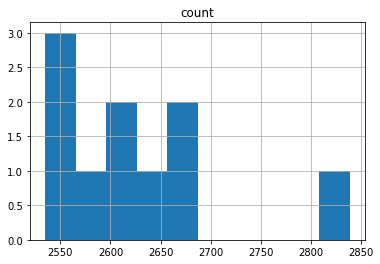

In [26]:
# countries - срез из второго задания
countries.hist()

Обычно по таким условиям рисуют столбчатую диаграмму:

,count
country_y,
IT,2839
SH,2672
AZ,2670
AT,2655
WF,2616
VA,2602
HU,2584
IL,2563
RO,2550


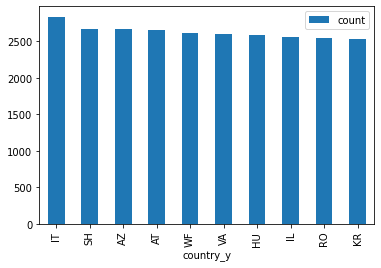

In [27]:
countries.plot(kind='bar')
countries